In [1]:
########################################
# 1) Environment Setup & Data Import
########################################
import warnings
warnings.filterwarnings("ignore", message="overflow encountered")
warnings.filterwarnings("ignore", message="divide by zero encountered")
warnings.filterwarnings("ignore", message="invalid value encountered in")
warnings.filterwarnings("ignore", message="The default of observed=False is deprecated")
warnings.filterwarnings("ignore", message="overflow encountered in reduce")

import numpy as np
import pandas as pd
import random
import math

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

print("Libraries imported and warnings suppressed.")

# Suppose we have the same local pickle as before:
df = pd.read_pickle("train_df_sample.pkl")
print("Data shape:", df.shape)
display(df.head(5))

########################################
# 2) Basic Cleaning Steps
########################################

def drop_null_cols(df, threshold=0.8):
    null_percent = df.isnull().mean()
    drop_cols = list(null_percent[null_percent > threshold].index)
    df = df.drop(drop_cols, axis=1)
    print(f"Dropped {len(drop_cols)} columns (>{threshold*100}% missing).")
    return df

df = drop_null_cols(df, 0.8)
print("After dropping high-missing columns:", df.shape)

cat_features = ["B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126", "D_63", "D_64", "D_68"]
cat_features = [f"{cf}_last" for cf in cat_features]
cat_features = [c for c in cat_features if c in df.columns]

# Label-encode categorical
for c in cat_features:
    df[c] = df[c].astype(str)

le_encoder = LabelEncoder()
for c in cat_features:
    df[c] = df[c].replace("nan", "NaN")
    df[c] = le_encoder.fit_transform(df[c])

target_col = "target"
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in cat_features and col != target_col]

# Example: sample 100 numeric columns
num_cols_sample = random.sample(numeric_cols, min(100, len(numeric_cols)))
imputer = SimpleImputer(strategy='mean')
df[num_cols_sample] = imputer.fit_transform(df[num_cols_sample])

print("Data cleaning done. Ready for OptBinning approach.")


Libraries imported and warnings suppressed.
Data shape: (100000, 919)


,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
f9e9fbdc82859e7fdcea35523a78f466aa40d1bb7158da9eb6f80f5f3e7b2c49,0.419922,0.033698,0.390381,0.449951,0.390869,0.336670,0.383050,0.000727,0.680176,0.680176,...,1,U,1,1,1.0,1,1,5.0,1,1
824526e632f8f6c497b71cb13ec0a519be76344d47297097c49afd0ac8d0ab01,0.603516,0.033983,0.542480,0.651367,0.613281,0.284424,0.238159,0.004951,0.801758,0.302979,...,13,U,1,0,NaN,0,13,6.0,1,0
b73f63bcbb43055d5bc1b0c4365efa407a939455387a253ea3f1101eb9bea8d3,0.823730,NaN,0.823730,0.823730,0.823730,0.000104,NaN,0.000104,0.000104,0.000104,...,0,NaN,0,0,NaN,0,0,NaN,0,0
783d9b5d9f6594d1a5a42d8474d328b72e8f2a5adc0a6004ba2874c72c3ecfef,0.925293,0.070185,0.702637,0.964844,0.957031,0.136353,0.149279,0.000043,0.389404,0.241455,...,13,O,1,13,1.0,1,13,6.0,1,0
2f6a347c73f2fd188d6e110f04275bacb5e0550d7d9d6c3939e8b0ee42469fa2,0.864258,0.017011,0.826172,0.890625,0.826172,0.105286,0.137151,0.004486,0.324707,0.215454,...,13,R,1,0,NaN,0,13,6.0,1,0


Dropped 106 columns (>80.0% missing).
After dropping high-missing columns: (100000, 813)
Data cleaning done. Ready for OptBinning approach.


In [2]:
%pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 1.3 MB/s eta 0:00:0000:0100:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 26.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-cloud-datastore 1.15.5 req

In [2]:
from optbinning import BinningProcess, Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
from sklearn.linear_model import LogisticRegression

print("OptBinning imported. We'll use BinningProcess & Scorecard modules.")

OptBinning imported. We'll use BinningProcess & Scorecard modules.


In [4]:
########################################
# 4) Running BinningProcess
########################################

# Suppose we combine the same numeric sample + cat_features as a feature_list
feature_list = num_cols_sample + cat_features
if target_col in feature_list:
    feature_list.remove(target_col)

X = df[feature_list]
y = df[target_col]

# Possibly define a selection criteria dict for IV thresholds, etc.
# For example:
selection_criteria = {
    "iv": {"min": 0.025, "max": 0.7, "strategy": "highest", "top": 20},
    "quality_score": {"min": 0.01}
}

binning_process = BinningProcess(
    variable_names=feature_list,
    categorical_variables=cat_features,
    selection_criteria=selection_criteria
)

binning_process.fit(X, y)  
print("BinningProcess fit completed.")

binning_process.information(print_level=2)
# This prints detailed info on binning steps, max_n_prebins, etc.

# If desired, we can also check which features got selected
selected_variables = binning_process.get_support(names=True)
print("Selected variables after binning:", selected_variables)

BinningProcess fit completed.
optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                yes   * U
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number o

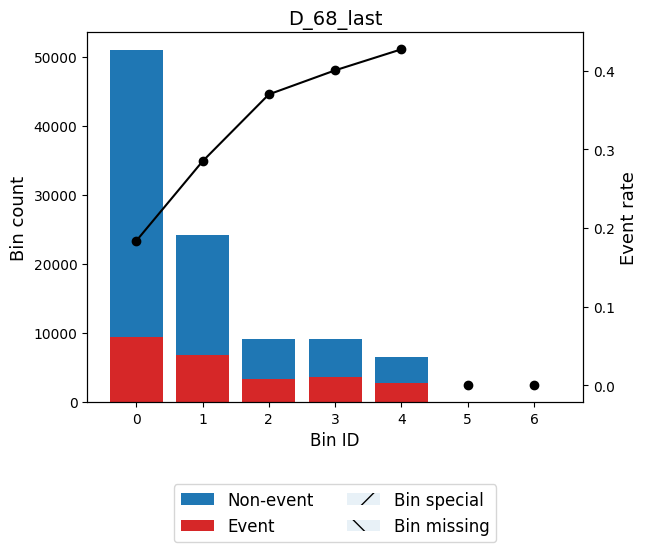

Scorecard fitted on X, y.


In [5]:
########################################
# 5) Reviewing Binning & Scorecard
########################################

# For instance, let's look at how D_68_last got binned:
optb = binning_process.get_binned_variable("D_68_last")
optb.binning_table.build()
optb.binning_table.plot(metric="event_rate")  # show event rates by bin

# Suppose we want a final logistic model using the binning process
estimator = LogisticRegression(solver="lbfgs")
scorecard = Scorecard(
    binning_process=binning_process,
    estimator=estimator,
    scaling_method="min_max",
    scaling_method_params={"min":300, "max":850}
)

scorecard.fit(X, y)
print("Scorecard fitted on X, y.")


In [6]:

# Summaries
sc = scorecard.table(style="summary")
print(sc)


      Variable           Bin     Points
0    D_112_min  (-inf, 0.00)  16.202538
1    D_112_min  [0.00, 0.00)  20.404337
2    D_112_min  [0.00, 0.01)  22.849019
3    D_112_min  [0.01, 1.00)  36.975735
4    D_112_min  [1.00, 1.00)  36.432076
..         ...           ...        ...
12    B_12_max       Missing  31.067077
0   D_120_last        [0, 2]  36.341527
1   D_120_last           [1]  13.163282
2   D_120_last       Special  31.067077
3   D_120_last       Missing  31.067077

[202 rows x 3 columns]


In [8]:

sc_detailed = scorecard.table(style="detailed")
sc_detailed


,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,D_112_min,0,"(-inf, 0.00)",7759,0.07759,3086,4673,0.602268,-1.457415,0.200436,0.023049,-0.292109,16.202538
1,D_112_min,1,"[0.00, 0.00)",7447,0.07447,3718,3729,0.500739,-1.045443,0.096981,0.011599,-0.292109,20.404337
2,D_112_min,2,"[0.00, 0.01)",9905,0.09905,5536,4369,0.441090,-0.805751,0.074716,0.009095,-0.292109,22.849019
3,D_112_min,3,"[0.01, 1.00)",35349,0.35349,29518,5831,0.164955,0.579323,0.101706,0.012538,-0.292109,36.975735
4,D_112_min,4,"[1.00, 1.00)",26869,0.26869,22236,4633,0.172429,0.526019,0.064713,0.007997,-0.292109,36.432076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,B_12_max,12,Missing,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,-0.480356,31.067077
0,D_120_last,0,"[0, 2]",81163,0.81163,64111,17052,0.210096,0.281859,0.060033,0.007479,-0.535946,36.341527
1,D_120_last,1,[1],18837,0.18837,9822,9015,0.478579,-0.956754,0.203779,0.024543,-0.535946,13.163282
2,D_120_last,2,Special,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,-0.535946,31.067077


Pred shape: (100000,)
Score range: 323.4341283989767 822.832155743726


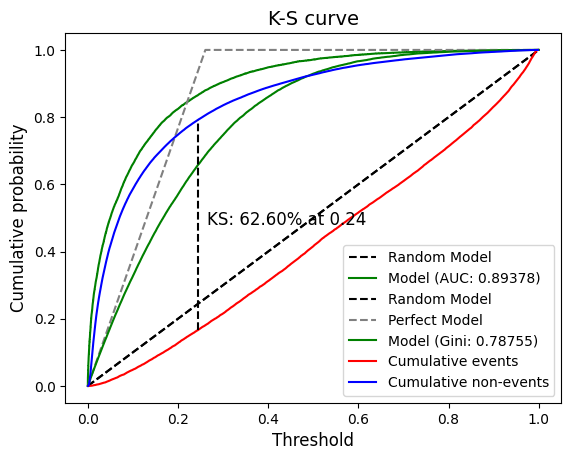

In [18]:
########################################
# 6) Evaluating the Scorecard Model
########################################

y_pred = scorecard.predict_proba(X)[:, 1]  # Probability of default
print("Pred shape:", y_pred.shape)

# Use built-in plot functions from optbinning
plot_auc_roc(y, y_pred, title="ROC curve")
plot_cap(y, y_pred, title="CAP curve")
plot_ks(y, y_pred, title="K-S curve")


# Or compute a credit score from the scorecard's logistic approach:
score = scorecard.score(X)
print("Score range:", score.min(), score.max())


Score range: 324.8980673251968 826.1849798511976


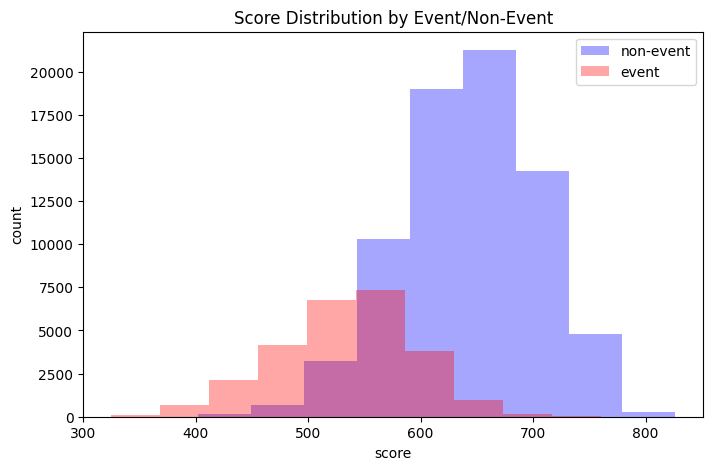

In [11]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
mask = (y == 0)
plt.hist(score[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score")
plt.ylabel("count")
plt.title("Score Distribution by Event/Non-Event")
plt.legend()
plt.show()


In [15]:
from optbinning.scorecard import ScorecardMonitoring
from sklearn.model_selection import train_test_split

# We'll do a quick train/test split to simulate reference vs. current data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit the scorecard on X_train
scorecard.fit(X_train, y_train)

# ScorecardMonitoring can track population/score shifts between X_train and X_test
monitoring = ScorecardMonitoring(
    scorecard=scorecard,
    psi_method="cart",
    psi_n_bins=10,
    verbose=True
)

monitoring.fit(X_test, y_test, X_train, y_train)

# Inspect the PSI table, significance tests, or system-level stability
psi_table = monitoring.psi_table()
psi_table

2025-02-01 06:20:08,344 | INFO : Monitoring started.
2025-02-01 06:20:08,345 | INFO : Options: check parameters.
2025-02-01 06:20:08,350 | INFO : System stability analysis started.
2025-02-01 06:20:08,931 | INFO : System stability analysis terminated. Time: 0.5790s
2025-02-01 06:20:08,932 | INFO : Variable analysis started.
2025-02-01 06:20:09,093 | INFO : Variable analysis terminated. Time: 0.1587s
2025-02-01 06:20:09,094 | INFO : Monitoring terminated. Time: 0.7501s


,Bin,Count A,Count E,Count A (%),Count E (%),PSI
0,"(-inf, 495.17)",2112,5179,0.070400,0.073986,0.000178
1,"[495.17, 532.32)",2121,4846,0.070700,0.069229,0.000031
2,"[532.32, 557.41)",2328,5259,0.077600,0.075129,0.000080
3,"[557.41, 581.12)",2780,6389,0.092667,0.091271,0.000021
4,"[581.12, 600.69)",2619,5938,0.087300,0.084829,0.000071
5,"[600.69, 612.89)",1688,4038,0.056267,0.057686,0.000035
6,"[612.89, 624.44)",1654,3798,0.055133,0.054257,0.000014
7,"[624.44, 651.36)",3876,9247,0.129200,0.132100,0.000064
8,"[651.36, 681.96)",4320,9928,0.144000,0.141829,0.000033
9,"[681.96, inf)",6502,15378,0.216733,0.219686,0.000040


In [16]:

tests_result = monitoring.tests_table()
tests_result

,Bin,Count A,Count E,Event rate A,Event rate E,statistic,p-value
0,"(-inf, 495.17)",2112,5179,0.878314,0.890133,2.086065e+00,0.148649
1,"[495.17, 532.32)",2121,4846,0.724658,0.724928,5.376273e-04,0.981501
2,"[532.32, 557.41)",2328,5259,0.569588,0.576155,2.846663e-01,0.593659
3,"[557.41, 581.12)",2780,6389,0.455755,0.428393,5.896004e+00,0.015175
4,"[581.12, 600.69)",2619,5938,0.284842,0.289155,1.649303e-01,0.684657
5,"[600.69, 612.89)",1688,4038,0.191943,0.210005,2.385573e+00,0.122460
6,"[612.89, 624.44)",1654,3798,0.139661,0.154028,1.868725e+00,0.171621
7,"[624.44, 651.36)",3876,9247,0.083591,0.083595,3.996531e-07,0.999496
8,"[651.36, 681.96)",4320,9928,0.034954,0.032031,8.079626e-01,0.368723
9,"[681.96, inf)",6502,15378,0.009074,0.007543,1.349842e+00,0.245306


In [17]:

report = monitoring.system_stability_report()
report


-----------------------------------
Monitoring: System Stability Report
-----------------------------------

  Population Stability Index (PSI)


    PSI total:      0.0006 (No significant change)

         PSI bin  Count  Count (%)
    [0.00, 0.10)     10        1.0
    [0.10, 0.25)      0        0.0
    [0.25, Inf+)      0        0.0

  Significance tests (H0: actual == expected)

     p-value bin  Count  Count (%)
    [0.00, 0.05)      1        0.1
    [0.05, 0.10)      0        0.0
    [0.10, 0.50)      5        0.5
    [0.50, 1.00)      4        0.4

  Target analysis

               Metric  Actual Actual (%)  Expected Expected (%)
    Number of records   30000          -     70000            -
        Event records    7820   0.260667     18247     0.260671
    Non-event records   22180   0.739333     51753     0.739329

  Performance metrics

                 Metric   Actual  Expected  Diff A - E
     True positive rate 0.577749  0.587165   -0.009416
     True negative rate 0.925